In [4]:
!pip install pandas numpy scikit-learn joblib matplotlib imbalanced-learn


In [5]:
!pip install seaborn



In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import joblib


In [7]:
data = pd.read_csv(r"C:\Users\kachh\OneDrive\Documents\GitHub\CREDIT-CARD-FRAUD-DETECTION\Credit-Card-Fraud-Detection\DATA\creditcard.csv")
print("✅ Dataset Loaded Successfully!")
data.head()


✅ Dataset Loaded Successfully!


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Feature shape: (284807, 30)
Label shape: (284807,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 2

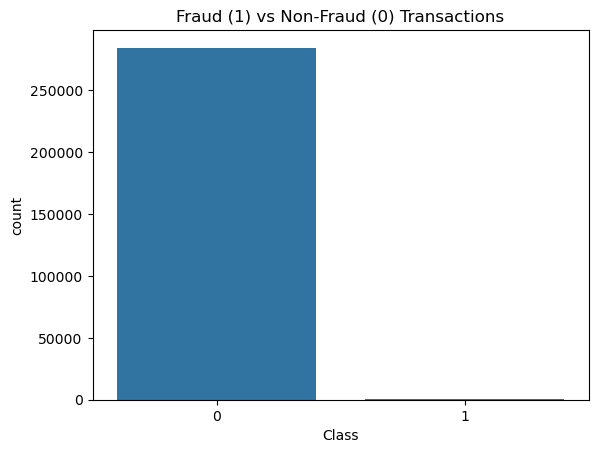

In [22]:
X = data.drop("Class", axis=1)   # All 30 features (Time, V1–V28, Amount)
y = data["Class"]

print("Feature shape:", X.shape)
print("Label shape:", y.shape)

print(data.info())
print(data.isnull().sum())
print(data['Class'].value_counts())

sns.countplot(x='Class', data=data)
plt.title("Fraud (1) vs Non-Fraud (0) Transactions")
plt.show()


In [23]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

print("After SMOTE:", X_res.shape, y_res.shape)



After SMOTE: (568630, 30) (568630,)


In [25]:

X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

print("✅ Data split completed!")
print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))



Train shape: (454904, 30)
Test shape: (113726, 30)
✅ Data split completed!
Training samples: 454904
Testing samples: 113726


In [26]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)  # Fit scaler only on training data
X_test_scaled = scaler.transform(X_test)




In [27]:
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train_scaled, y_train)

print("✅ Model training complete!")



✅ Model training complete!



Accuracy: 0.999903276295658

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



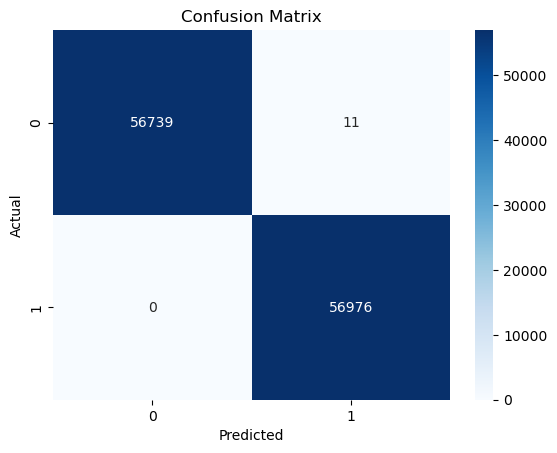

In [28]:
y_pred = model.predict(X_test_scaled)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [29]:
import pickle
import os

os.makedirs("model", exist_ok=True)

with open("model/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("model/model.pkl", "wb") as f:
    pickle.dump(model, f)

print("🎉 Model and Scaler saved successfully!")






🎉 Model and Scaler saved successfully!


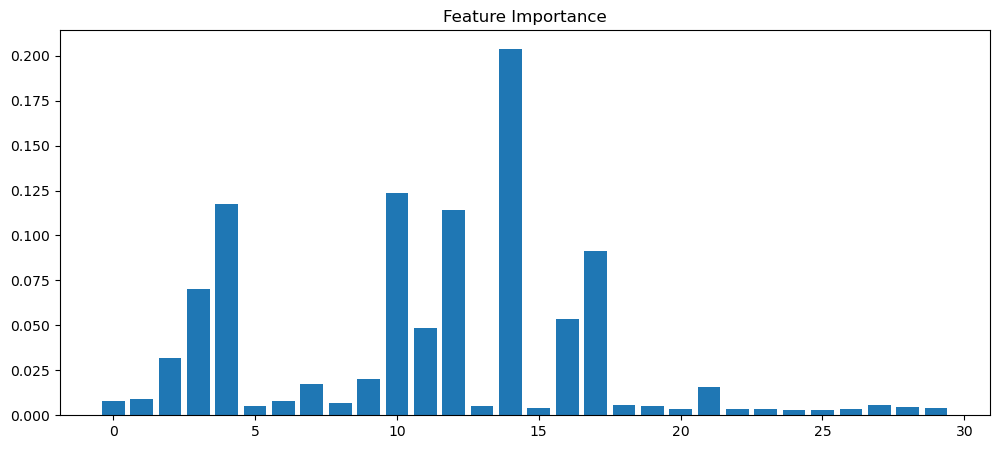

In [30]:
importances = model.feature_importances_
plt.figure(figsize=(12,5))
plt.bar(range(len(importances)), importances)
plt.title("Feature Importance")
plt.show()
